In [37]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
data = {'age' : [27,29,29,28,42,39,41,38,36,35,37,26,27,28,29,32,40,41,43,39,41,39],
        'income':[70000,90000,61000,60000,150000,155000,160000,162000,156000,130000,137000,45000,48000,51000,49500,53000,65000,63000,64000,80000,82000,58000]
}
df = pd.DataFrame(data, columns=['age','income'])
df.head()

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


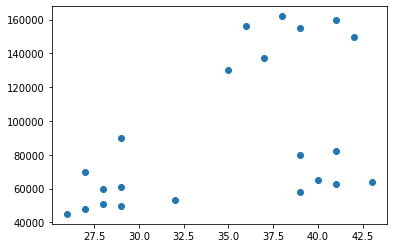

In [39]:
plt.scatter(df.age,df.income)

In [40]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
y_predicted = km.fit_predict(df[['age','income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [42]:
df['cluster'] = y_predicted
df.head()

,age,income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


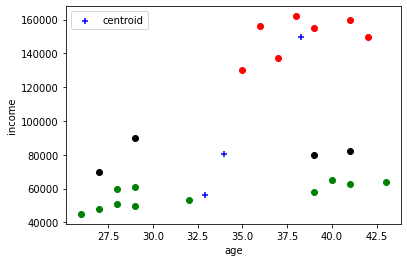

In [43]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1.income,color='green')
plt.scatter(df2.age,df2.income,color='red')
plt.scatter(df3.age,df3.income,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='+',label='centroid')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()

In [44]:
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])
df

,age,income,cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [45]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['age','income']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [46]:
df['cluster'] = y_predicted
df

,age,income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [48]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

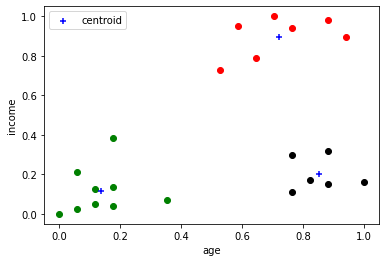

In [47]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.age,df1.income,color='green')
plt.scatter(df2.age,df2.income,color='red')
plt.scatter(df3.age,df3.income,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='+',label='centroid')

plt.xlabel('age')
plt.ylabel('income')
plt.legend()

In [49]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['age','income']])
  sse.append(km.inertia_)

In [50]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.2157860776587302,
 0.17681044133887713,
 0.13762504146528043,
 0.10188787724979426]

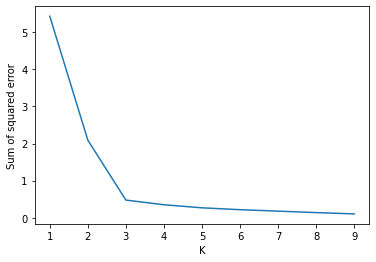

In [51]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)